**Using scikit-learn to implement k nearest neighbors on a dataset and performing cross-validation to decide how many neighbors perform best.** 

***Importing all the required libraries such as numpy,pandas,sklearn***

In [491]:
%matplotlib inline
import os # importing os library for use of operating systems related functions such as os.environ(), os.path() etc
import numpy as np # importing numpy library for use of numpy functions and declaring it as 'np' for its ease of use
import pandas as pd # importing pandas library for use of pandas functions and declaring it as 'pd' for easy use
import seaborn as sns # importing seaborn library to use seaborn library functions and declaring it as sns 
import matplotlib.pyplot as plt # importing matplotlib.pyplot library to use matplotlib functions and using it as plt in further code
#from pygeocoder import Geocoder
import sklearn #importing sklearn to import subsquent functionality such as KNearestNeighbor
from sklearn import datasets

***Importing Titanic Dataset with 4 columns such as PassengerId, Age, Fare, Pclass***

In [528]:
fp="C:/Users/Ashwini/Desktop/STATS & ML/Titanic Dataset.csv"
result_data=pd.read_csv(fp)#accessing fp to read .csv file using pd.read_csv()
result_data.head() #displays first 5 rows from the dataframe.

,PassengerId,Age,Fare,Pclass
0,1,22,7,Third Class
1,2,38,71,First Class
2,3,26,8,Third Class
3,4,35,53,First Class
4,5,35,8,Third Class


***In the below code we will be dividing data into 2 sets: Training & Testing by importing train_test_split for checking the accuracy of model***

In [530]:
import numpy as np
from sklearn.cross_validation import train_test_split

# creating design matrix X and target vector y to separate data into 2 parts for checking the accuracy
X = np.array(result_data.ix[:, 0:3]) # end index is exclusive
y = np.array(result_data['Pclass'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# split into train and test

## K-nearest neighbors

***Here we are randomly selecting value of k as 3 to check the accuracy of model, further we will using an arbitrary k value for checking how cross validation can be used to find its optimal value***

In [527]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print ('Accuracy:',accuracy_score(y_test, pred))

Accuracy: 0.670542635659


## Cross Validation

** Cross validation can be used to determine the test error in order to evaluate the performance of the model and for selecting the level of flexibility **

***Estimating the test error rate by holding out a subset of the training set from the fitting process. This subset, called the validation set.Among various validation techniques we will be using k-fold cross validation.In our case value of k is 10, hence the process we will be implementing is 10-fold cross validation***

***Calculating cross validation score by importing cross_val_score to perform the 10-fold cross validation by using a generated list of odd K’s ranging from 1 to 50.***

In [531]:
from sklearn.cross_validation import cross_val_score # import cross_val_score to calculate the cross validation score
myList = list(range(1,50))

neighbors = list(filter(lambda x: x % 2 != 0, myList))# subsetting just the odd ones

cv_scores = []# empty list that will hold cv scores

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())# perform 10-fold cross validation by defining cv=10
    
cv_scores # print cross validation scores for each record in the data frame

[0.67520155131315085,
 0.68200811229038372,
 0.68273164255756946,
 0.69256580470681606,
 0.69741194746149482,
 0.69748736224279195,
 0.69748699071462306,
 0.69743042962865009,
 0.69646926269528064,
 0.69356597666092656,
 0.6907291470481669,
 0.68877750957672756,
 0.68582625472493208,
 0.67901913917394452,
 0.67710576910390585,
 0.66938527239140455,
 0.66547322213440863,
 0.66639649319454619,
 0.66443533735265192,
 0.65962764504495952,
 0.65574396685374281,
 0.65189781300758898,
 0.64895663110000323,
 0.64604345516702522,
 0.64510114192897994]

***Calculating mean squared error for each record and finding out the index of best k. Best K is the one that corresponds to the lowest test error rate. In our case index of best k value is 5***

In [516]:
MSE = [1 - x for x in cv_scores] # calculating Mean squared error of each record 

from sklearn.neighbors import NearestNeighbors
optimal_k = [MSE.index(min(MSE))]# determining best k
print ('Index of best k:',optimal_k) # Index of best k is 5

Index of best k: [5]


***Plotting number of neighbors vrs the error values which we have calculated in the above block***

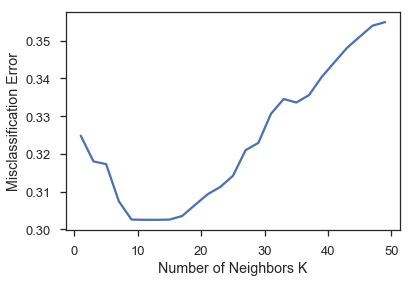

In [517]:
optimal_k = neighbors[MSE.index(min(MSE))]
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')# defining label x
plt.ylabel('Misclassification Error')# defining label y
plt.show() #Display plot 

***We need to perform the predict method which required to compute the euclidean distance between the “new” observation and all the data points in the training set. Furthermore, we need to select the K nearest neighbors to perform a majority vote.***

***In the below code, we are creating an array of distances, finding out the k nearest neighbors***

In [532]:
def train(X_train, y_train):
     return

def predict(X_train, y_train, x_test, k):
# create list for distances and targets
    distances = []
    targets = []

    for i in range(len(X_train)):
# first we compute the euclidean distance
        distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
# add it to list of distances
        distances.append([distance, i])

# sort the list
    distances = sorted(distances)

# make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

# return most common target
    return Counter(targets).most_common(1)[0][0]


***Performing a majority vote using counter***

In [520]:
from collections import Counter
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
# train on the input data
    train(X_train, y_train)

# loop over all observations
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

***Finding out the accuracy of the model as follows:***

In [521]:
predictions = []

kNearestNeighbor(X_train, y_train, X_test, predictions, 5)

# transform the list into an array
predictions = np.asarray(predictions)

# evaluating accuracy
accuracy = accuracy_score(y_test, predictions)
print(accuracy*100)

67.0542635659


***value of K can’t be arbitrarily large as we can’t have more neighbors than the number of observations in the training data set hence using try block in the above code***

In [533]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
# check if k larger than n
    if k > len(X_train):
        raise ValueError

# train on the input data
    train(X_train, y_train)
# predict for each testing observation
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

# making our predictions 
predictions = []
try:
    kNearestNeighbor(X_train, y_train, X_test, predictions, 5)
    predictions = np.asarray(predictions)
# evaluating accuracy
    accuracy = accuracy_score(y_test, predictions) * 100
    print(accuracy)

except ValueError:
    print('Can not have more neighbors than training records')

67.0542635659


***Creating a scaterplot of Age vrs Fare columns of data set***

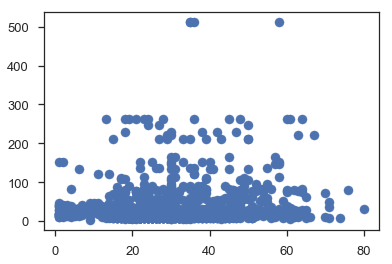

In [510]:
import matplotlib.pyplot as plt

x=result_data['Age']
y=result_data['Fare']
plt.scatter(x,y)
plt.show()

*** References: https://www.kaggle.com/schmitzi/titanic-data-cleaning ***